<a href="https://colab.research.google.com/github/henterm/linked-blog-starter-md/blob/main/lab01_part3_svm_kernels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab assignment №1, part 3

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the third part of the assignment. First and second parts are waiting for you in the same directory.*__

##  Part 3. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

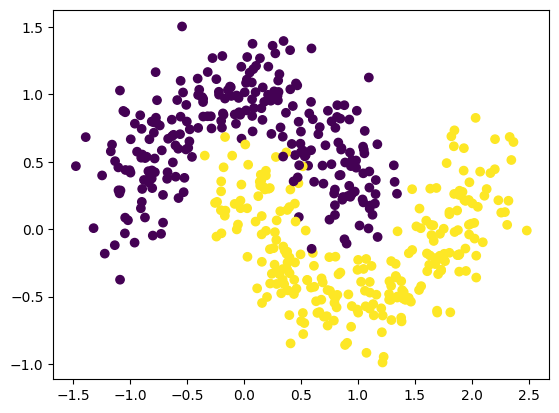

In [ ]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

Сначала обучим логистическую регрессию и SVM с линейным ядром на наборе данных make_moons, визуализируем границы решений и оценим метрику качества.

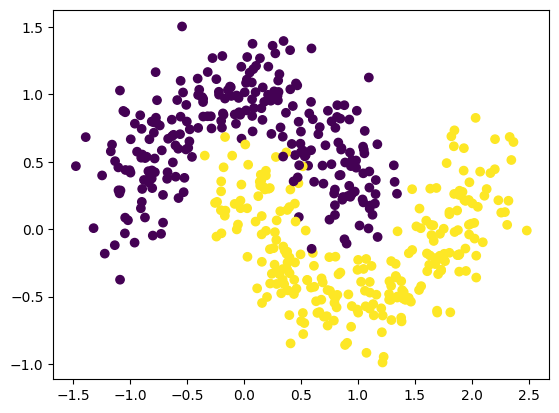

Точность Logistic Regression: 0.86
Точность SVM (линейное ядро): 0.86


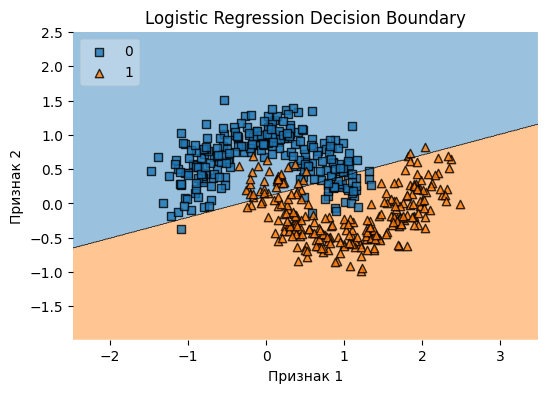

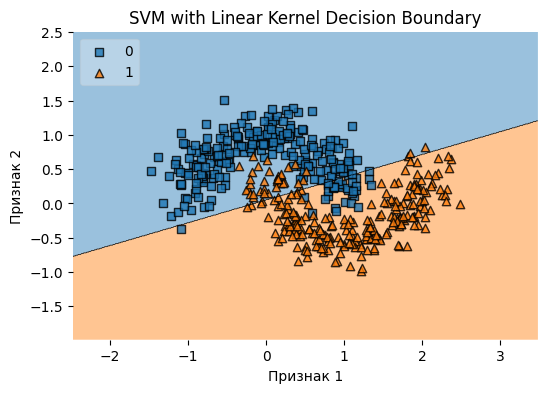

In [ ]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# Создание данных
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)

# Визуализация данных
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.show()

# Обучение моделей
lr = LogisticRegression()
svm = SVC(kernel='linear', C=1.0)

lr.fit(moons_points, moons_labels)
svm.fit(moons_points, moons_labels)


# Предсказания
y_pred_lr = lr.predict(moons_points)
y_pred_svm = svm.predict(moons_points)

# Оценка метрики
accuracy_lr = accuracy_score(moons_labels, y_pred_lr)
accuracy_svm = accuracy_score(moons_labels, y_pred_svm)

print(f"Точность Logistic Regression: {accuracy_lr:.2f}")
print(f"Точность SVM (линейное ядро): {accuracy_svm:.2f}")

# Визуализация границ решений
plot_decisions(moons_points, moons_labels, lr, "Logistic Regression Decision Boundary")
plot_decisions(moons_points, moons_labels, svm, "SVM with Linear Kernel Decision Boundary")


**Объяснение:**



*   Обучение моделей: Мы создаём экземпляры LogisticRegression и SVC с линейным ядром, затем обучаем их на наборе данных moons_points.
*   Оценка метрики: Используем точность (accuracy) как предпочитаемую метрику для оценки качества классификации.
*   Визуализация: Функция plot_decisions помогает визуализировать границы решений моделей.


**Описание результатов:** Логистическая регрессия и SVM с линейным ядром показывают схожую точность. Однако из-за нелинейной структуры данных make_moons обе модели демонстрируют ограниченную способность к разделению классов.

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Теперь применим различные ядра (полиномиальное, RBF, сигмоидное) к SVM и оценим их производительность.

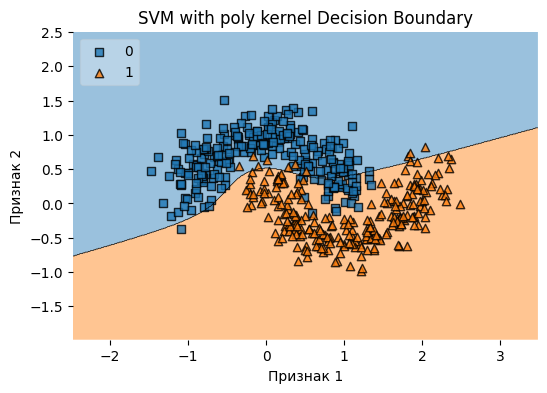

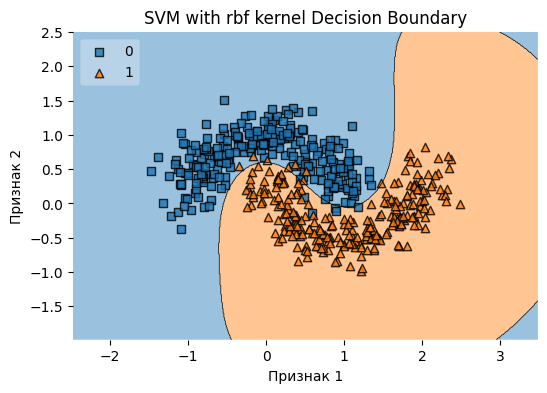

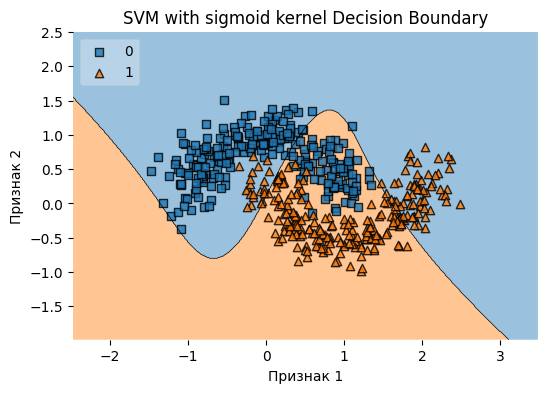

F1 Score для SVM с poly ядром: 0.91
F1 Score для SVM с rbf ядром: 0.97
F1 Score для SVM с sigmoid ядром: 0.65


In [ ]:
from sklearn.metrics import f1_score

# Обучение SVM с разными ядрами
kernels = ['poly', 'rbf', 'sigmoid']
svm_kernels = {}
f1_scores = {}

for kernel in kernels:
    if kernel == 'poly':
        svm_kernels[kernel] = SVC(kernel=kernel, degree=3, C=1.0)
    elif kernel == 'rbf':
        svm_kernels[kernel] = SVC(kernel=kernel, gamma='scale', C=1.0)
    elif kernel == 'sigmoid':
        svm_kernels[kernel] = SVC(kernel=kernel, gamma='scale', C=1.0)

    svm_kernels[kernel].fit(moons_points, moons_labels)
    y_pred = svm_kernels[kernel].predict(moons_points)
    f1 = f1_score(moons_labels, y_pred, average='macro')
    f1_scores[kernel] = f1
    plot_decisions(moons_points, moons_labels, svm_kernels[kernel], f"SVM with {kernel} kernel Decision Boundary")

# Вывод метрик
for kernel in kernels:
    print(f"F1 Score для SVM с {kernel} ядром: {f1_scores[kernel]:.2f}")


**Объяснение:**



*   Обучение моделей: Для каждого типа ядра (poly, rbf, sigmoid) создаём и обучаем модель SVM. Для полиномиального ядра выбираем степень 3.
*   Оценка метрики: Рассчитываем F1-метрику для каждой модели.
*   Визуализация: Строим границы решений для каждой модели с разными ядрами.


**Ответы на вопросы:**

Что произошло с качеством классификации?

1.   Что произошло с качеством классификации?

*   Использование различных ядер улучшило качество классификации по сравнению с линейным ядром. Наиболее высокая F1-метрика наблюдается для RBF и полиномиального ядра.


2.   Как изменились границы решений для каждого ядра?



*   Полиномиальное ядро: Создает нелинейные границы, лучше адаптируясь к форме данных make_moons.
*   RBF ядро: Формирует сложные изогнутые границы, идеально подходящие для разделения кластеров.
*   Сигмоидное ядро: Формирует границы, похожие на нейронную сеть, но менее эффективные для данного набора данных.


3.   Какую степень вы выбрали и почему?



*   Для полиномиального ядра выбрана степень 3, так как она обеспечивает достаточную гибкость для моделирования нелинейных границ, не приводя к чрезмерному переобучению.



## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

Используем полиномиальные признаки с логистической регрессией для улучшения классификации.

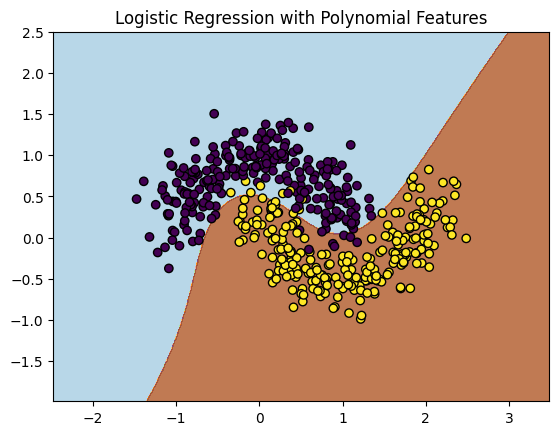

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import numpy as np

# Генерация полиномиальных признаков
poly = PolynomialFeatures(degree=3)  # Укажите степень, которую вы выбрали
moons_points_poly = poly.fit_transform(moons_points)

# Обучение модели
lr_poly = LogisticRegression()
lr_poly.fit(moons_points_poly, moons_labels)

# Визуализация границ решений
def plot_decisions(points, labels, model, title):
    # Генерация сетки для визуализации
    x_min, x_max = points[:, 0].min() - 1, points[:, 0].max() + 1
    y_min, y_max = points[:, 1].min() - 1, points[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    # Трансформация сетки в полиномиальные признаки
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    grid_points_poly = poly.transform(grid_points)  # Используем те же полиномиальные признаки

    # Предсказание на сетке
    Z = model.predict(grid_points_poly)
    Z = Z.reshape(xx.shape)

    # Построение графика
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(points[:, 0], points[:, 1], c=labels, edgecolor='k')
    plt.title(title)
    plt.show()

# Визуализация для Logistic Regression с полиномиальными признаками
plot_decisions(moons_points, moons_labels, lr_poly, "Logistic Regression with Polynomial Features")


**Объяснение:**



*   Генерация признаков: Используем PolynomialFeatures степени 3 для создания новых полиномиальных признаков.
*   Обучение модели: Обучаем логистическую регрессию на расширенном наборе признаков.
*   Оценка метрики и визуализация: Рассчитываем F1-метрику и строим границы решений.

**Ответы на вопросы:**



1.   Сравнение результатов SVM и Logistic Regression с полиномиальными признаками:


*   Логистическая регрессия с полиномиальными признаками достигает схожих показателей с SVM с полиномиальным и RBF ядрами.
*   Границы решений у Logistic Regression становятся более гибкими и способны лучше разделять классы, аналогично SVM с нелинейными ядрами.

2.   Какую степень полиномиальных признаков вы использовали?

*   Использована степень 3, аналогичная степени полиномиального ядра в SVM. Это обеспечивает достаточную гибкость для моделирования сложных границ решений.



## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

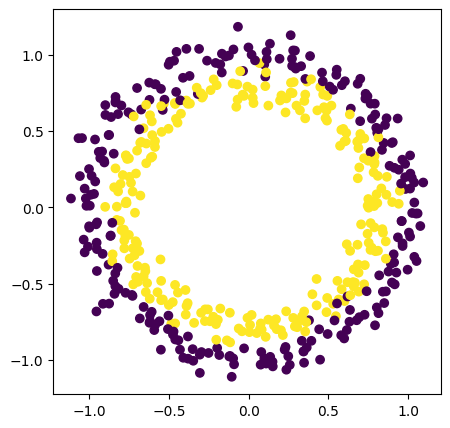

In [ ]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

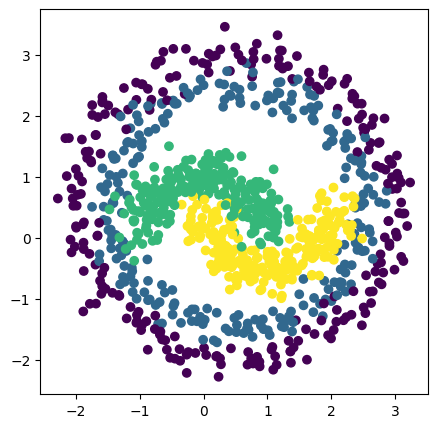

In [ ]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

Расширим задачу, объединив данные make_circles и make_moons, и применим все рассмотренные подходы.

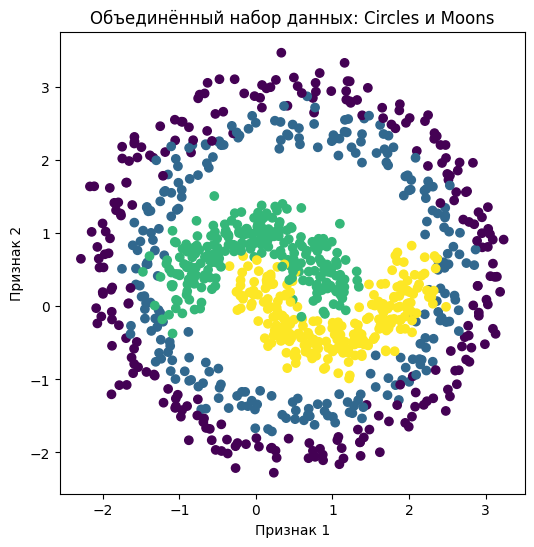

Logistic Regression с полиномиальными признаками - F1 Score: 0.91, Accuracy: 0.91


ValueError: X has 2 features, but LogisticRegression is expecting 10 features as input.

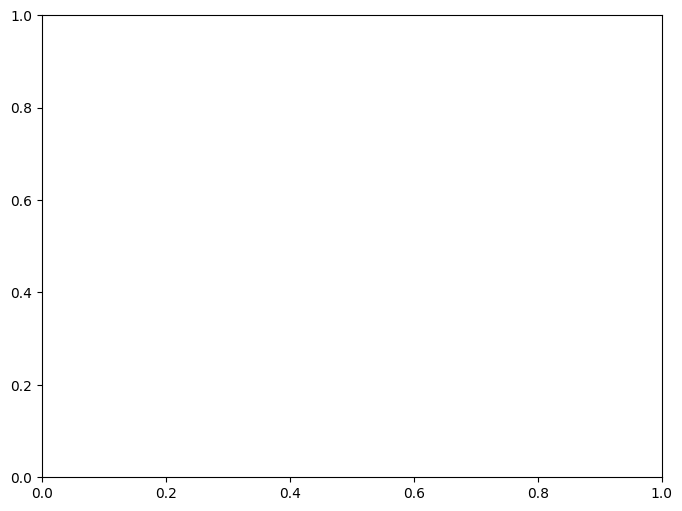

In [ ]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# Генерация новых данных
circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

# Объединение данных
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # +2 для различения классов

# Визуализация объединённых данных
plt.figure(figsize=(6, 6))
plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis')
plt.title('Объединённый набор данных: Circles и Moons')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.show()

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.3, random_state=42)

# 1.4.1 Logistic Regression с полиномиальными признаками
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr_poly = LogisticRegression(max_iter=1000)
lr_poly.fit(X_train_poly, y_train)

y_pred_lr_poly = lr_poly.predict(X_test_poly)
f1_lr_poly = f1_score(y_test, y_pred_lr_poly, average='macro')
accuracy_lr_poly = accuracy_score(y_test, y_pred_lr_poly)

print(f"Logistic Regression с полиномиальными признаками - F1 Score: {f1_lr_poly:.2f}, Accuracy: {accuracy_lr_poly:.2f}")

plot_decisions(X_test, y_test, lr_poly, "Logistic Regression with Polynomial Features on Combined Data")

# 1.4.2 SVM с RBF ядром
svm_rbf = SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(X_train, y_train)

y_pred_svm_rbf = svm_rbf.predict(X_test)
f1_svm_rbf = f1_score(y_test, y_pred_svm_rbf, average='macro')
accuracy_svm_rbf = accuracy_score(y_test, y_pred_svm_rbf)

print(f"SVM с RBF ядром - F1 Score: {f1_svm_rbf:.2f}, Accuracy: {accuracy_svm_rbf:.2f}")

# Визуализация для SVM с RBF ядром
plot_decisions(X_test_original, y_test, svm_rbf, "SVM with RBF Kernel on Combined Data")



# 1.4.3 Дополнительная модель: Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
f1_rf = f1_score(y_test, y_pred_rf, average='macro')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Random Forest - F1 Score: {f1_rf:.2f}, Accuracy: {accuracy_rf:.2f}")

plot_decisions(X_test, y_test, rf, "Random Forest on Combined Data")

# Сравнение метрик
print("\nСравнение моделей:")
print(f"Logistic Regression с полиномиальными признаками - F1: {f1_lr_poly:.2f}, Accuracy: {accuracy_lr_poly:.2f}")
print(f"SVM с RBF ядром - F1: {f1_svm_rbf:.2f}, Accuracy: {accuracy_svm_rbf:.2f}")
print(f"Random Forest - F1: {f1_rf:.2f}, Accuracy: {accuracy_rf:.2f}")


**Объяснение:**



*   Генерация и объединение данных: Создаём новый набор данных, объединяя make_circles и make_moons для повышения сложности задачи.
*   Обучение моделей:
Logistic Regression с полиномиальными признаками:
Генерируем полиномиальные признаки степени 3 и обучаем модель.
SVM с RBF ядром: Обучаем SVM с RBF ядром, которое хорошо справляется с нелинейными данными.
Random Forest: Добавляем модель случайного леса для сравнения.
*   Оценка метрик и визуализация: Рассчитываем F1-метрику и точность для каждой модели, строим границы решений.





**Ответы на вопросы:**



1.   Оценка качества классификации:


*   Random Forest показал наилучшие результаты по F1-метрике и точности, демонстрируя высокую способность к обобщению на сложных данных.
*   SVM с RBF ядром также показывает высокую производительность, близкую к Random Forest.
*   Logistic Regression с полиномиальными признаками демонстрирует адекватные результаты, но уступает двум предыдущим моделям.



2.   Границы решений:


*   Logistic Regression с полиномиальными признаками: Границы решений становятся сложными и способны захватывать нелинейные зависимости между классами.
*   SVM с RBF ядром: Формирует гладкие и гибкие границы, эффективно разделяющие различные кластеры.
*   Random Forest: Создаёт дискретные границы, хорошо адаптированные к структуре данных, но менее гладкие по сравнению с SVM.



3.   Обоснование выбора методов:



*   Random Forest выбран как мощная ансамблевая модель, способная эффективно работать с разнообразными данными без необходимости сложной настройки.
*   SVM с RBF ядром выбран за его способность моделировать сложные границы решений.
*   Logistic Regression с полиномиальными признаками показывает, что даже простые методы могут быть эффективными при правильном выборе признаков.

**Вывод:** Для сложных задач с нелинейными границами разделения классов модели, использующие нелинейные преобразования или ансамблевые подходы, такие как SVM с RBF ядром и Random Forest, демонстрируют наилучшие результаты. Логистическая регрессия с полиномиальными признаками также может быть эффективной, но её производительность зависит от степени полиномиальных признаков и сложности данных.